<a href="https://colab.research.google.com/github/MuhammadFaturrahmanSaputra/Capstone_Bangkit/blob/main/Model%20ML/Build%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import shutil
import os
import urllib.request

from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import Dense, MaxPooling1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

# **Memuat Dataset**

---

In [2]:
# Jalur ke file CSV di Github
url = 'https://raw.githubusercontent.com/MuhammadFaturrahmanSaputra/Capstone_Bangkit/main/Dataset/CSV.csv'

# Path folder tujuan di Colab
folder = '/content/Dataset/'

# Buat folder jika tidak ada
if not os.path.exists(folder):
    os.makedirs(folder)

# Unduh file dari Github ke Colab
file_name = os.path.join(folder, 'CSV.csv')
urllib.request.urlretrieve(url, file_name)

# Periksa apakah file berhasil diunduh
if os.path.exists(file_name):
    print("File CSV berhasil diunduh ke folder 'File Csv' di Colab.")
else:
    print("Gagal mengunduh file CSV.")

File CSV berhasil diunduh ke folder 'File Csv' di Colab.


In [4]:
# Membaca file CSV dan membuat DataFrame
df = pd.read_csv(url)

# Menampilkan beberapa baris dari DataFrame
df.head(10)

,Memperbaiki Barang,Merakit Benda,Membongkar-Pasang Barang,Mengutak-atik Barang,Menganalisis Masalah,Mencari Solusi,Menghitung,Berfikir Logis,Menari,Bermusik,...,Membantu,Menjual Benda,Mengelola Acara,Memimpin Kelompok,Membujuk Orang,Mengikuti Aturan,Mengurutkan,Membereskan Barang,Menjalankan Rutin,Fakultas
0,0,1,1,1,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,Ilmu Teknik
1,1,1,1,1,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,0,Ilmu Ekonomi dan Bisnis
2,1,1,0,0,1,1,0,1,0,0,...,1,0,1,1,1,1,1,1,1,Ilmu Sosial dan Humaniora
3,0,1,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,Ilmu Profesi dan Ilmu Terapan
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,Ilmu Seni
5,0,0,0,0,1,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,Ilmu Sosial dan Humaniora
6,1,1,0,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,Ilmu Pendidikan
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Ilmu Teknik
8,1,0,1,1,0,0,1,1,0,1,...,1,0,0,1,1,1,1,1,1,Ilmu Komputer dan Teknologi
9,0,1,0,0,1,1,1,1,0,0,...,1,1,0,1,0,1,1,1,1,Ilmu Seni


In [4]:
# Periksa jumlah data
print(f"Jumlah data: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")

Jumlah data: 600
Jumlah kolom: 25


In [5]:
df['Fakultas'].value_counts()

Ilmu Teknik                       50
Ilmu Ekonomi dan Bisnis           50
Ilmu Sosial dan Humaniora         50
Ilmu Profesi dan Ilmu Terapan     50
Ilmu Seni                         50
Ilmu Pendidikan                   50
Ilmu Komputer dan Teknologi       50
Ilmu Matematika dan IPA (MIPA)    50
Ilmu Sastra dan Budaya            50
Ilmu Kesehatan                    50
Ilmu Olahraga                     50
Ilmu Pertanian                    50
Name: Fakultas, dtype: int64

# **Visualisasi Data**

---

# **Konversi Tipe Data**

---

In [6]:
df.dtypes

Memperbaiki Barang           int64
Merakit Benda                int64
Membongkar-Pasang Barang     int64
Mengutak-atik Barang         int64
Menganalisis Masalah         int64
Mencari Solusi               int64
Menghitung                   int64
Berfikir Logis               int64
Menari                       int64
Bermusik                     int64
Menggambar                   int64
Menulis Cerita               int64
Mengajar                     int64
Memberi Saran                int64
Memahami Orang Lain          int64
Membantu                     int64
Menjual Benda                int64
Mengelola Acara              int64
Memimpin Kelompok            int64
Membujuk Orang               int64
Mengikuti Aturan             int64
Mengurutkan                  int64
Membereskan Barang           int64
Menjalankan Rutin            int64
Fakultas                    object
dtype: object

In [7]:
# Mengubah tipe data kolom fitur menjadi boolean
konversi_bool = ['Memperbaiki Barang', 'Merakit Benda', 'Membongkar-Pasang Barang', 'Mengutak-atik Barang', 'Menganalisis Masalah',
               'Mencari Solusi', 'Menghitung', 'Berfikir Logis', 'Menari', 'Bermusik', 'Menggambar', 'Menulis Cerita', 'Mengajar',
               'Memberi Saran', 'Memahami Orang Lain', 'Membantu', 'Menjual Benda', 'Mengelola Acara', 'Memimpin Kelompok',
               'Membujuk Orang', 'Mengikuti Aturan', 'Mengurutkan', 'Membereskan Barang', 'Menjalankan Rutin']

for kolom in konversi_bool:
    df[kolom] = df[kolom].astype(bool)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Memperbaiki Barang        600 non-null    bool  
 1   Merakit Benda             600 non-null    bool  
 2   Membongkar-Pasang Barang  600 non-null    bool  
 3   Mengutak-atik Barang      600 non-null    bool  
 4   Menganalisis Masalah      600 non-null    bool  
 5   Mencari Solusi            600 non-null    bool  
 6   Menghitung                600 non-null    bool  
 7   Berfikir Logis            600 non-null    bool  
 8   Menari                    600 non-null    bool  
 9   Bermusik                  600 non-null    bool  
 10  Menggambar                600 non-null    bool  
 11  Menulis Cerita            600 non-null    bool  
 12  Mengajar                  600 non-null    bool  
 13  Memberi Saran             600 non-null    bool  
 14  Memahami Orang Lain       

# **Memisahkan Fitur dan Label**

---

Memisahkan kolom yang menjadi 2 variabel yaitu Fakultas sebagai (**labels**) dan Minat, Bakat, dan Aspirasi peserta didik sebagai (**features**)

## FATUR

In [9]:
# Memisahkan fitur dan label
features = df.iloc[:, :-1]  # Mengambil semua kolom kecuali kolom terakhir
labels = df.iloc[:, -1]     # Mengambil kolom terakhir sebagai label

print(features.shape)
print(labels.shape)

(600, 24)
(600,)


# **Data Preprocessing**

---



## FATUR

In [10]:
# Konversi label kategorikal menjadi one-hot encoding
labels_one_hot = pd.get_dummies(labels)

# # Mencetak lima baris pertama dari DataFrame yang sudah diubah menjadi one-hot encoding
print(labels_one_hot.head())

# Memisahkan data menjadi data training dan data validation
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels_one_hot,
                                                                            test_size=0.2,
                                                                            random_state=42)

print("\ntrain_features: ", len(train_features))
print("train_labels: ", len(train_labels))
print("test_features: ", len(test_features))
print("test_labels: ", len(test_labels))

# Konversi DataFrame Pandas menjadi array NumPy
train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Normalisasi fitur
train_features = tf.keras.utils.normalize(train_features, axis=1)
test_features = tf.keras.utils.normalize(test_features, axis=1)

   Ilmu Ekonomi dan Bisnis  Ilmu Kesehatan  Ilmu Komputer dan Teknologi  \
0                        0               0                            0   
1                        1               0                            0   
2                        0               0                            0   
3                        0               0                            0   
4                        0               0                            0   

   Ilmu Matematika dan IPA (MIPA)  Ilmu Olahraga  Ilmu Pendidikan  \
0                               0              0                0   
1                               0              0                0   
2                               0              0                0   
3                               0              0                0   
4                               0              0                0   

   Ilmu Pertanian  Ilmu Profesi dan Ilmu Terapan  Ilmu Sastra dan Budaya  \
0               0                              0          

# **Membangun Model**

---

In [64]:
# model ini blm komplit jdi silahkan research kita pake layer brp, dan layer yg terakhir jgn di ganti
model = Sequential([
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dropout(0.05),
    Dense(units=16, activation='relu'),
    Flatten(),
    Dense(len(labels_one_hot.columns), activation="softmax")
])

# **Buat Class Callbacks**

---

Early stopping membantu mencegah overfitting dan menghasilkan model yang lebih baik dalam melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya.

In [65]:
early_stopping = EarlyStopping(monitor='accuracy',
                               patience=20,
                               restore_best_weights=True)

# **Compile dan Melatih Model**




---

In [66]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(train_features,
                    train_labels,
                    validation_data=(test_features, test_labels),
                    epochs=500,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/500
15/15 [==============================] - 2s 31ms/step - loss: 2.4795 - accuracy: 0.0875 - val_loss: 2.4702 - val_accuracy: 0.1000
Epoch 2/500
15/15 [==============================] - 0s 10ms/step - loss: 2.4600 - accuracy: 0.1271 - val_loss: 2.4362 - val_accuracy: 0.2917
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 2.4237 - accuracy: 0.1667 - val_loss: 2.3945 - val_accuracy: 0.2583
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 2.3824 - accuracy: 0.2188 - val_loss: 2.3265 - val_accuracy: 0.2833
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 2.3002 - accuracy: 0.2708 - val_loss: 2.2188 - val_accuracy: 0.3083
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 2.1881 - accuracy: 0.3250 - val_loss: 2.0665 - val_accuracy: 0.4250
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 2.0567 - accuracy: 0.3583 - val_loss: 1.8987 - val_accuracy: 0.4000
Epoch 8/500

In [27]:
# Menampilkan nilai accuracy dan val_accuracy pada akhir pelatihan
nilai_accuracy = round(history.history['accuracy'][-1] * 100)
nilai_val_accuracy = round(history.history['val_accuracy'][-1] * 100)
print(f'Nilai Accuracy: {nilai_accuracy}%')
print(f'Nilai Val_Accuracy: {nilai_val_accuracy}%')

Nilai Accuracy: 88%
Nilai Val_Accuracy: 84%


In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                1600      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 flatten_7 (Flatten)         (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 12)               

# **Plot Loss dan Accuracy**

---

| Algorithnm | Kolom 1) | Kolom 2 | Kolom 3 | Kolom 4
| --- | --- | --- | --- | --- |
| NEURAL NETWORK 1 | 0.869 | 0.788 | 0.820 | 0.833|
| NEURAL NETWORK 2 | 0.827 | 0.780 | 0.790 | 0.785 |

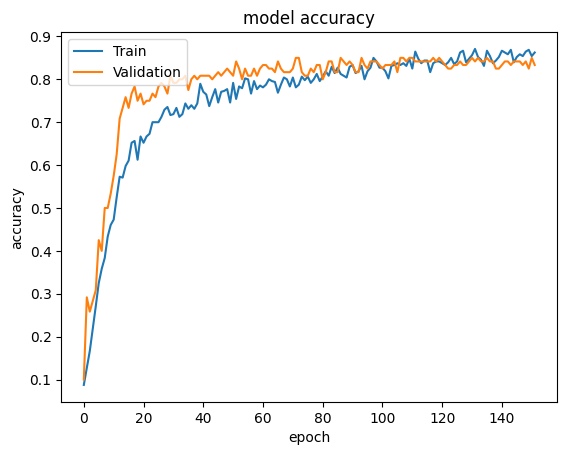

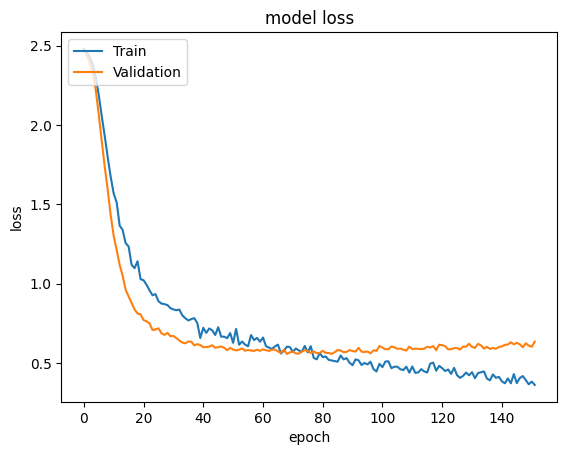

In [67]:
# plot training dan validation accuracy per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print("\n")

# plot training dan validation loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Evaluasi Model**

---

In [17]:
# Evaluasi model
loss, accuracy = model.evaluate(test_features, test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 0s 3ms/step - loss: 0.7657 - accuracy: 0.8417
Loss: 0.7657029032707214
Accuracy: 0.8416666388511658


# **Predict Model**

---

In [23]:
# Input fitur yang akan diprediksi (sesuaikan dengan jumlah fitur yang digunakan dalam model)
input_features = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]])

# Normalisasi input fitur
input_features_normalized = tf.keras.utils.normalize(input_features, axis=1)

# Melakukan prediksi berdasarkan input fitur
predictions = model.predict(input_features_normalized)

# Menampilkan hasil prediksi
print(predictions)

# Mendapatkan indeks dengan nilai tertinggi dari output model
predicted_class_index = np.argmax(predictions)
print("\nIndeks dengan nilai tertinggi:", predicted_class_index)

# Label Encoding yang telah digunakan sebelumnya
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Invers transform dari indeks ke label fakultas
predicted_fakultas = label_encoder.inverse_transform([predicted_class_index])

# Menampilkan nama fakultas yang diprediksi berdasarkan indeks
print("\nKamu cocok dengan Fakultas:", predicted_fakultas[0])

1/1 [==============================] - 0s 146ms/step
[[2.05268562e-02 5.13351639e-04 1.19500255e-04 6.65774988e-03
  3.04279238e-01 5.10794576e-04 1.80713378e-05 1.80851278e-09
  2.01124977e-02 6.36535943e-01 2.75090360e-06 1.07232425e-02]]

Indeks dengan nilai tertinggi: 9

Kamu cocok dengan Fakultas: Ilmu Seni


# **Save Model**

---

In [19]:
model.save("sistem_rekomendasi_jurusan.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
